In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
## function to plot lines
def abline(intercept, slope, color):
     axes = plt.gca()
     x_vals = np.array(axes.get_xlim())
     y_vals = intercept + slope * x_vals
     plt.plot(x_vals, y_vals, '--', color=color)

In [3]:
######################################
## Toy example on salary and College
######################################
# Read data
mydata_C = pd.read_csv("SalaryData_college.csv")

## Simple linear regression (not included in lecture notes)
X0 = mydata_C['Experience']
X0 = sm.add_constant(X0)  # Add a constant term (intercept)
y0 = mydata_C['Salary']
model0 = sm.OLS(y0, X0).fit()

print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     653.8
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           4.00e-77
Time:                        19:50:10   Log-Likelihood:                -3133.3
No. Observations:                 300   AIC:                             6271.
Df Residuals:                     298   BIC:                             6278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.023e+04    848.058     47.439      0.0

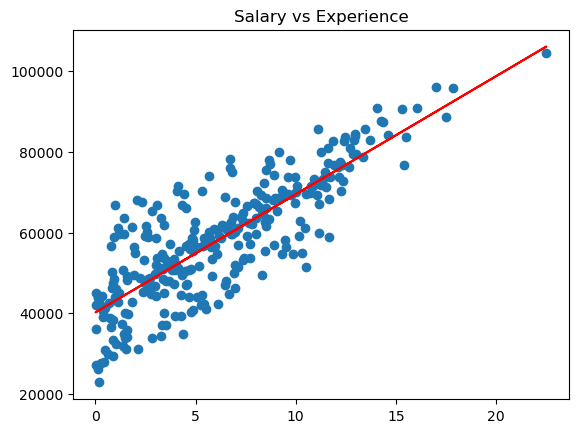

In [4]:
# Plot the data and regression line
plt.scatter(mydata_C['Experience'], mydata_C['Salary'], marker='o')
plt.plot(mydata_C['Experience'], model0.predict(X0), color='red')
plt.title('Salary vs Experience')
plt.show()

In [5]:
## Now let's try multiple linear regression model (first example in lecture notes)
X1 = mydata_C[['Experience', 'Max_college']]
X1 = sm.add_constant(X1)
y1 = mydata_C['Salary']
model1 = sm.OLS(y1, X1).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     701.6
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          3.01e-113
Time:                        19:50:13   Log-Likelihood:                -3045.7
No. Observations:                 300   AIC:                             6097.
Df Residuals:                     297   BIC:                             6109.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.784e+04    653.348     57.922      

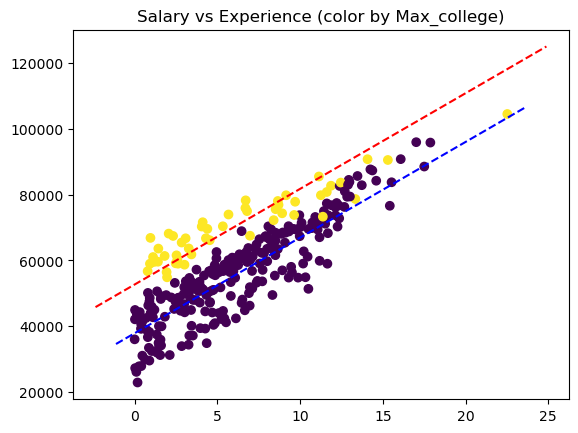

In [6]:
## Representing the regression model
plt.scatter(mydata_C['Experience'], mydata_C['Salary'], c=mydata_C['Max_college'], marker='o')
plt.title('Salary vs Experience (color by Max_college)')
abline(intercept=model1.params[0], slope=model1.params[1], color='blue')
abline(intercept=model1.params[0]+model1.params[2], slope=model1.params[1], color='red')
plt.show()

In [7]:
# Now let's do Predictions
newdata = pd.DataFrame({'const':[1 ,1], 'Experience': [10, 10], 'Max_college': [0, 1]})
my_predictions = model1.predict(newdata)
print(my_predictions)

0    66954.156549
1    81780.715792
dtype: float64


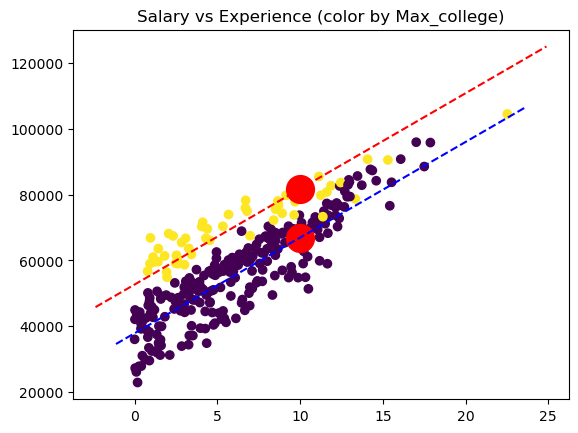

In [8]:
# Plot predictions
plt.scatter(mydata_C['Experience'], mydata_C['Salary'], c=mydata_C['Max_college'], marker='o')
plt.title('Salary vs Experience (color by Max_college)')
abline(intercept=model1.params[0], slope=model1.params[1], color='blue')
abline(intercept=model1.params[0]+model1.params[2], slope=model1.params[1], color='red')
plt.scatter(newdata['Experience'], my_predictions, marker='o', s=400, color='red')
plt.show()

In [9]:

###################################
## Categorical variables
##################################
# Read data
mydata = pd.read_csv("SalaryData_education.csv")
mydata.head()

,Salary,Experience,Education
0,82743.367066,11.868954,college
1,54776.832947,9.310534,no_high_school
2,64862.238035,7.367446,high_school
3,61599.700524,8.506314,high_school
4,56775.362388,4.574724,high_school


In [10]:
# One-hot encoding
mydata['Max_no_high_school'] = (mydata['Education'] == 'no_high_school').astype(int)
mydata['Max_high_school'] = (mydata['Education'] == 'high_school').astype(int)
mydata['Max_college'] = (mydata['Education'] == 'college').astype(int)

mydata.head()

,Salary,Experience,Education,Max_no_high_school,Max_high_school,Max_college
0,82743.367066,11.868954,college,0,0,1
1,54776.832947,9.310534,no_high_school,1,0,0
2,64862.238035,7.367446,high_school,0,1,0
3,61599.700524,8.506314,high_school,0,1,0
4,56775.362388,4.574724,high_school,0,1,0


In [11]:
# Train a multiple linear regression model with binary variables
X2 = mydata[['Experience', 'Max_high_school', 'Max_college']]
X2 = sm.add_constant(X2)
y2 = mydata['Salary']
model2 = sm.OLS(y2, X2).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1572.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          1.83e-181
Time:                        19:50:19   Log-Likelihood:                -2883.0
No. Observations:                 300   AIC:                             5774.
Df Residuals:                     296   BIC:                             5789.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.899e+04    529.097     

In [12]:
# Predictions for person A, B, and C
newCDE = pd.DataFrame({'const': [1.0,1.0,1.0],
                       'Experience': [0, 5, 10],
                       'Max_high_school': [0, 1, 0],
                       'Max_college': [1, 0, 0]})

# Make predictions
my_predictionsCDE = model2.predict(newCDE)
print(my_predictionsCDE)

0    53294.340541
1    55764.760550
2    57094.901053
dtype: float64


In [13]:

##########################
## Interaction terms
##########################

# Read original data
mydata_C = pd.read_csv("SalaryData_college.csv")

# Create an interaction term
mydata_C['Experience_x_MaxCollege'] = mydata_C['Experience'] * mydata_C['Max_college']

mydata_C.head()

,Salary,Experience,Max_college,Experience_x_MaxCollege
0,82743.367066,11.868954,1,11.868954
1,54776.832947,9.310534,0,0.000000
2,64862.238035,7.367446,0,0.000000
3,61599.700524,8.506314,0,0.000000
4,56775.362388,4.574724,0,0.000000


In [14]:
# Linear model with interaction
X3 = mydata_C[['Experience', 'Max_college', 'Experience_x_MaxCollege']]
X3 = sm.add_constant(X3)
y3 = mydata_C['Salary']
model3 = sm.OLS(y3, X3).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     520.7
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          1.06e-117
Time:                        19:50:22   Log-Likelihood:                -3031.9
No. Observations:                 300   AIC:                             6072.
Df Residuals:                     296   BIC:                             6087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

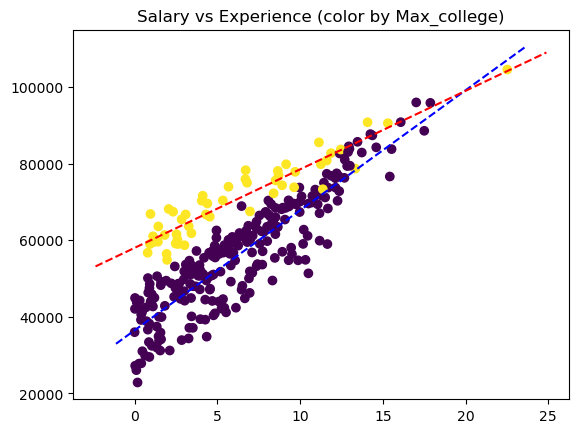

In [15]:
# Plot the data and regression lines with interaction term
plt.scatter(mydata_C['Experience'], mydata_C['Salary'], c=mydata_C['Max_college'] + 1, marker='o')
plt.title('Salary vs Experience (color by Max_college)')
# Interpreting Regression lines
abline(intercept=model3.params[0], slope=model3.params[1], color='blue')
abline(intercept=model3.params[0]+model3.params[2], slope=model3.params[1]+model3.params[3], color='red')

In [16]:

# Prediction
newdata = pd.DataFrame({'const':[1.0,1.0],
                        'Experience': [10, 10], 'Max_college': [0, 1], 
                        'Experience_x_MaxCollege': [0, 10]})
my_predictions = model3.predict(newdata)
print(my_predictions)

0    67826.588802
1    78510.407021
dtype: float64


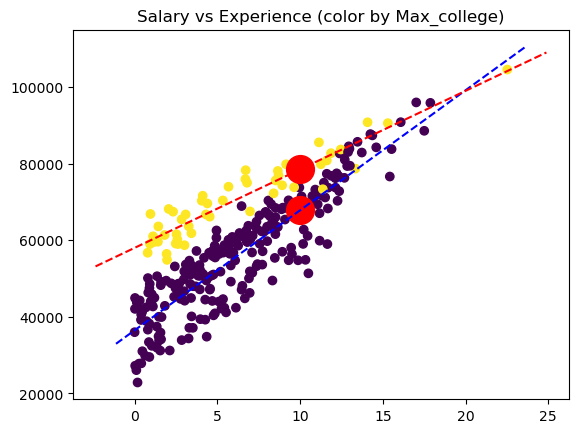

In [17]:
# Plot the data and regression lines with interaction term
plt.scatter(mydata_C['Experience'], mydata_C['Salary'], c=mydata_C['Max_college'] + 1, marker='o')
plt.title('Salary vs Experience (color by Max_college)')
# Interpreting Regression lines
abline(intercept=model3.params[0], slope=model3.params[1], color='blue')
abline(intercept=model3.params[0]+model3.params[2], slope=model3.params[1]+model3.params[3], color='red')
## Pot the predictions
plt.scatter(newdata['Experience'], my_predictions, marker='o', s=400, color='red')
plt.show()